In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import derivative as drv
import six
import math
from copy import deepcopy

INPUT
==============================
Maximize x1 + x2 + 3x3

Subject to 3x1 + 2x2 + x3 ≤ 3

2x1 + x2 + 2x3 ≤ 2

x1, x2, x3 ≥ 0

OUTPUT
===========================
 ( x_1, x_2,  x_3 ) = ( 0.0, 0.0, 1.0 )

 Optimal value of Z = 3.0

OUTPUT: ( x_1, x_2, x_3 ) = ( 0.0, 0.0, 1.0 )
Optimal Value Z :  3.0


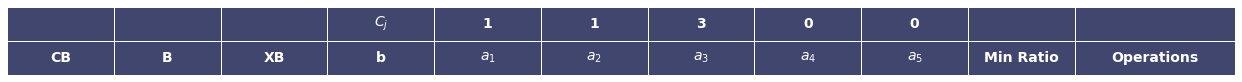

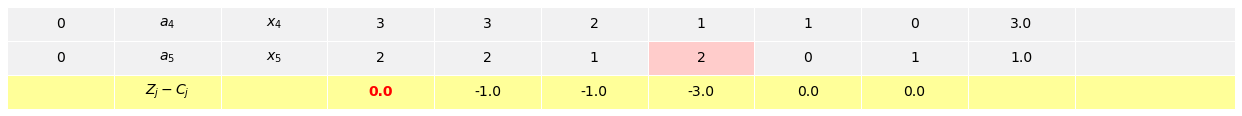

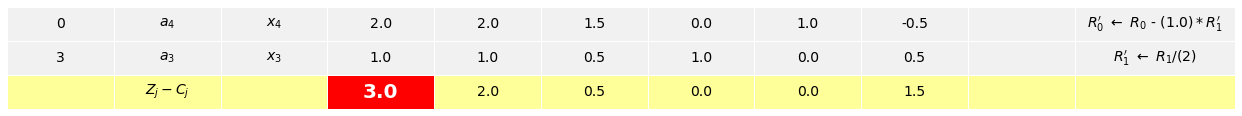

In [23]:
### INPUT
C = [1, 1, 3]
Eq = [[3, 2, 1, 'leq', 3],
     [2, 1, 2, 'leq', 2]]

### OUTPUT
Simplex_Maximize(C,Eq)
## Note. Please First Compile the function in the below cell, then run the current cell

OUTPUT: ( x_1, x_2 ) = ( 2.6667, 0.3333 )
Optimal Value Z :  8.6667


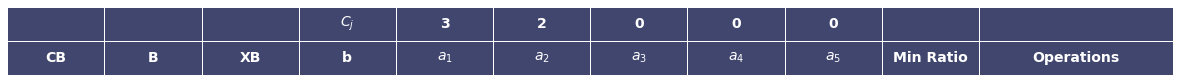

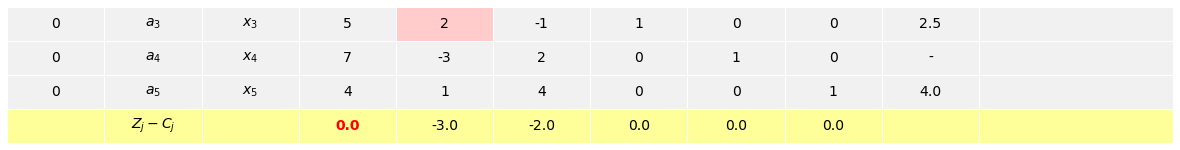

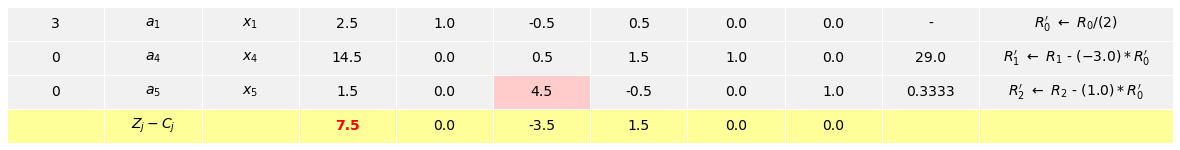

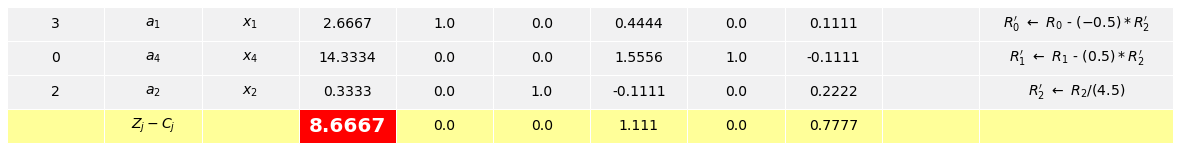

In [29]:
################### Function to Plot a Table  ####################################
def plot_table(data, basic = 2, total = 5, leaving = -1, entering = -1, final = 0, col_width=1.9, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
  
    data = np.array(deepcopy(data))
    if ax is None:
        size = (data.shape * np.array([row_height, col_width]))[::-1]
        fig, ax = plt.subplots(figsize=(size))
        ax.axis('off')

    mpl_table = ax.table(cellText=data, bbox=bbox, colWidths=[col_width if i!=total+5 else 3.8 for i in range(total+6)], cellLoc ='center', **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        elif k[0] == len(data)-1 and header_columns == 0:
            cell.set_facecolor('#FFFF99')
            if k[1] == 3:
              cell.set_text_props(weight='bold', color='r')
              if final == 1:
                cell.set_facecolor('r')
                cell.set_text_props(weight='bold', color='w',size = 20)
        else: 
            cell.set_facecolor(row_colors[0])
            if k[0] == leaving and k[1] == 3 + entering: 
              cell.set_facecolor('#FFCCCB')
    return ax

####### Convert Variable into Mathematical Form while Printing ############
def aform(i):
  return '$a_{}$'.format(i)
def inva(s):
  return int(s[3])
def xform(i):
  return '$x_{}$'.format(i)


################## Simplex Function for Maximization ########################33 
def Simplex_Maximize(C,Eq):

  C = np.array(C)

  n = len(C)
  basic = len(Eq)
  total = n + basic

  ###################### Function that Creates Next Table #############3
  ## i : Leaving Variable
  ## j:  Entering Variable
  def nextt(tb,i,j):
    tbl = deepcopy(tb)
    pivot = tbl[i][j+3]
    enter = np.around(np.array((tbl[i][3:4+total]))/pivot,4)
    tbl[i] = [0 if j>n else C[j-1], aform(j), xform(j)] + list(enter) + ["","$R_{}'$ $\leftarrow$ $R_{}$$/({})$".format(i,i,pivot)]
    for ii in range(basic):
      if ii!=i:
        p = float(tbl[ii][j+3])
        r = np.array(tbl[ii][3:4+total],dtype=np.float64) - p*enter
        r = np.around(r,4)
        tbl[ii] = tbl[ii][:3] + list(r) + ["","$R_{}'$ $\leftarrow$ $R_{}$ - $({})*R_{}'$".format(ii,ii,p,i)]
    return deepcopy(tbl)

  ############## Check Feasibility of Optimal Solution #################
  def is_feasible(x):
    for eq in Eq:
      if np.sum(x*np.array(eq[:n])) > eq[-1] + 0.001:
        return False
    return True
  
  ############### Error Message for Invalid Input ##############
  def re():
    print("Invalid Input!!!\nAssumptions:\n1. Enter 0 for the variable which does not appear in the equation.\n2. All the constraints must be 'leq' type.\n3. Check the dimensions for the Equations.\n4. Optimal Solution Must Exist.\n5. There must be atleast One constraint equation\n6. Standard form requires bi>=0 for all i\n.")

  ############## Check for Invalid Input ################33
  for eq in Eq:
    if len(eq) < n + 2 or eq[n] != 'leq' or eq[-1] < 0:
      return re()
    for ele in eq:
      if type(ele)!=int:
        if ele!='leq':
          return re()

  ############## Converting to AX  = b  Standard Form using SLACK Variables ############3
  A = []
  for i in range(len(Eq)):
    eq = Eq[i]
    z = [0]*basic
    z[i] = 1
    A += [[eq[-1]] + eq[:n] + z]

  ######################### Plot Column Headers ########################################3
  names = [""]*3 + ['$C_j$'] + list(C) + [0]*basic + [""]*2
  title = ['CB', 'B', 'XB', 'b'] +  [aform(i) for i in range(1,n+1)] + [aform(i+n) for i in range(1,basic+1)] + ['Min Ratio', 'Operations']
  mat = [names, title]
  plot_table(mat, basic, total, header_columns=2)

  #################### Create First Table ##############################
  table = []
  for i in range(basic):
      r = [0,aform(i+n+1),xform(i+n+1)] + A[i] + [""]*2
      table += [r]
  r = ["","$Z_{j} - C_{j}$",""] +  [""]*8
  table += [r]

  flag = 0

  ## Keep Iterating Until Optimal State is reached Or UnBounded Solution Is Encountered ##
  while 1:

    ######################### Create Zj - Cj Row ################################
    ZC = np.array([0] + list(-C) + [0]*basic, np.float64)
    for i in range(basic):
      ZC += table[i][0]*np.array(table[i][3:3+total+1],np.float64)
    ZC = np.around(ZC,4)
    r = ["","$Z_{j} - C_{j}$",""] + list(ZC) + [""]*2
    table[-1] = r

    ########################### Find Pivot Column ###################################
    j = np.argmin(ZC)

    ############ If Zj - Cj >= 0 for All j Optimal State is Reached ################
    if ZC[j] >= 0:

      ################# Values in column "b" will be the Values of Final Basic Variables ############
      B = {inva(table[i][1]):table[i][3] for i in range(basic)}
      X = np.array([B[i] if i in B else 0 for i in range(1,n+1)])

      ####################  Check Feasibility  #############################
      if is_feasible(X):
        print("OUTPUT: ( ",end='')
        for i in range(1,n): print('x_{}, '.format(i),end='')
        print('x_{} ) = ('.format(n),end=' ')
        for x in X[:-1]: print(x,end=", ")
        Z = np.sum(np.array(C)*X)
        print(X[-1],')\nOptimal Value Z : ',round(Z,4))
      else:
        print('Infeasible Solution')
        plot_table(table, basic, total) 
        return

      ########## Check If there are Infinite Solutions #############
      if flag == 1:
        print('Infinite Solutions')
        plot_table(table, basic, total, final =1)
        return
    
      for j in range(1,n+1):
        if ZC[j] == 0 and j not in B:
          flag = 1
          break

      ###### Plot the final table with highlighted solution #############
      if flag == 0:
        plot_table(table, basic, total, final = 1)
        return

    ################### Find Min Ratio #########################
    ii = -1
    for i in range(basic):
      x = table[i][j+3] 
      b = table[i][3]
      if x==0:
        table[i][-2] = 'inf'
      elif b/x < 0:
        table[i][-2] = '-'
      else:
        table[i][-2] = round(b/x,4)
        if ii < 0 or table[i][-2] < table[ii][-2]:  
          ii = i 

    ################# If every element is either inf or negative - Unbounded Solution  ################
    if ii < 0:
      plot_table(table,basic,total) 
      return print('Unbounded Solution')
    
    ################ Get the next table from LEAVING anf ENTERING Variables #######################
    plot_table(table,basic,total,ii,j)
    table = nextt(table,ii,j)
C = [3,2]
Eq = [[2, -1,'leq',5],[-3, 2, 'leq',7],[1, 4,'leq',4]]
Simplex_Maximize(C,Eq)